## Observations and Insights 

#### Ramicane and Capomulin are the only drugs which show promise

Through my work with box plots and and bar plots, there is clear evidence that ramicane and capomulin are having a strong affect. The line plots for these drugs indicate that tumor volume essentially never continues to grow, and often goes towards remission. In contrast, every other group continues to experience tumor growth. In fact, comparing the end volume of tumors between all other groups and the placebo, there is no statistical difference it would seem. 

#### Weight is highly correlated with the average size of the tumor

Weight was shown to have an 84 percent pearson correlation for varying with tumor volume. This analysis was done averaging across the weights and volumes within individuals, so it is unlikely to simply reflect the increased volume of the tumor increasing weight.

### Gender Distribution

While at first survey, the gender distribution seems even, when we break it down between groups, it is less even. This is important to note because one of the two groups which has a gender imbalance is ramicane. It is important for us to understand whether there could be any difference in response to this drug between males and females. More analysis is required to establish whether there may be a gender effect.

### Statistical Analysis

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine = mouse_metadata.merge(study_results, on = "Mouse ID", how = 'outer')
# Display the data table for preview
combine.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
number_of_mice = len(combine['Mouse ID'].value_counts())
number_of_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dups_check = combine.groupby(['Mouse ID', 'Timepoint'])['Timepoint'].count().reset_index('Mouse ID')
dups = dups_check.loc[dups_check['Timepoint'] > 1]
dups

,Mouse ID,Timepoint
Timepoint,,
0,g989,2
5,g989,2
10,g989,2
15,g989,2
20,g989,2


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
combine.set_index('Mouse ID').loc['g989']


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combine = combine.set_index('Mouse ID').drop('g989').reset_index()

In [6]:
# Checking the number of mice in the clean DataFrame.
len(combine['Mouse ID'].value_counts())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grouping = combine.groupby('Drug Regimen')['Tumor Volume (mm3)']
group_summary_stats = pd.DataFrame({
    "Mean":  round(grouping.mean(), 2),
    "Median":  round(grouping.median(), 2),
    "Variance":  round(grouping.var(), 2),
    "Standard Deviation":  round(grouping.std(), 2),
    "Standard Error": round(grouping.sem(ddof=1), 2)
}
)  
group_summary_stats

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_summary = combine.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'], axis='columns').apply(lambda x: round(x, 2))
aggregate_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [9]:
#Get an Array that has the total count of mice in each treatment condition.
group_size = combine.drop_duplicates('Mouse ID').groupby('Drug Regimen')['Mouse ID'].count()

<AxesSubplot:title={'center':'Number of Mice per Regimen'}, ylabel='Drug Regimen'>

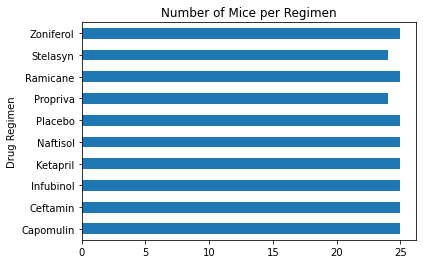

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
#I decided to make this a horzontal graph to better display the names of the drugs.
#I opted against using the rot command because this was still easier to read.
group_size.plot(kind = 'barh', title='Number of Mice per Regimen', ylabel = 'Number of Mice')

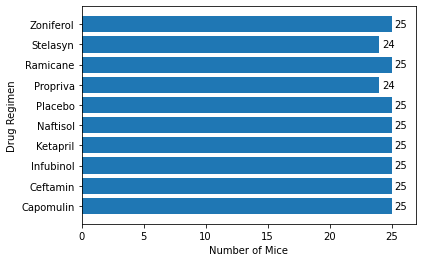

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
gsize_plot, ax = plt.subplots()
ax.set_ylabel('Drug Regimen')
ax.set_xlabel('Number of Mice')
ax.set_xlim(0, 27)
#I make the graph equal to hbar rather than simply setting it so that I can pass those bars to the bar_label method below.
hbars = ax.barh(group_size.index, group_size, align = 'center')
#bar_labels is a method from matplotlib 3.4+, and will only work if matplotlib has its most recent version.
#It is only in this because it doesn't seem to be supported as a kwarg in pandas.
ax.bar_label(hbars, padding=3)
plt.show()

In [12]:
#Create a object with the sex ratios to graph off of in the following example.
male_female = combine.groupby('Sex')['Sex'].count()

<AxesSubplot:title={'center':'Sex of Subjects'}, ylabel='Sex'>

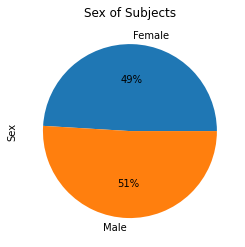

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#I pass autopct as a kwarg from pd.plot into matplotlib.
male_female.plot(kind='pie', title="Sex of Subjects", autopct = '%1.f%%', )

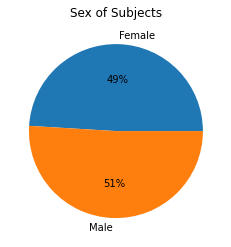

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf_pie, mf_ax = plt.subplots() 
mf_ax.pie(male_female, autopct='%1.f%%', labels=male_female.index)
plt.title('Sex of Subjects')
plt.show()

In [15]:
#Finally, I am going to do an additional chart showing the sex of subjects broken into groups. 
mf_treatment = combine.drop_duplicates('Mouse ID').groupby(['Sex', 'Drug Regimen'])['Sex'].count()

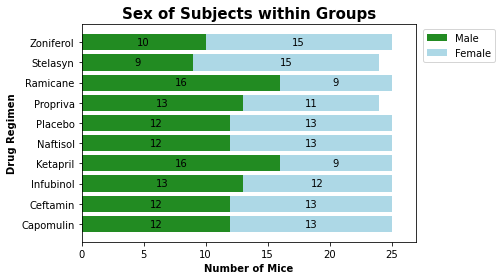

In [16]:
#Stacked bar chart in matplotlib
stacked_plt, stacked_ax = plt.subplots()
stacked_ax.set_xlim(0, 27)
male_bars = stacked_ax.barh(mf_treatment.loc['Male'].index, mf_treatment.loc['Male'], label='Male', color='forestgreen')
female_bars  = stacked_ax.barh(mf_treatment.loc['Female'].index, mf_treatment.loc['Female'], left=mf_treatment.loc['Male'], label='Female',color='lightblue')
stacked_ax.set_ylabel('Drug Regimen',fontweight='bold')
stacked_ax.set_xlabel('Number of Mice', fontweight='bold')
stacked_ax.bar_label(male_bars, label_type='center')
stacked_ax.bar_label(female_bars, label_type='center')
stacked_ax.legend(loc='best', bbox_to_anchor=(1.25, 1))
plt.title("Sex of Subjects within Groups", fontweight='bold', fontsize='15')
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#I pivot the dataframe to get one which has the tumor volume organized by timepoint and mouseID
tumor_time_points = combine.pivot(index=['Drug Regimen','Mouse ID'], columns = 'Timepoint', values = 'Tumor Volume (mm3)')
#Store a list for the last time point tumors
final_tumors= []
#iterate through the dataframe by number rather than index, to avoid complications with my multi-index
for i in range(0, len(tumor_time_points)):
    #Append to my list the value in each row with the final "Valid Index" - a non-Na or blank value
    final_tumors.append(tumor_time_points.iloc[i][tumor_time_points.iloc[i].last_valid_index()])
final_tumor_points = tumor_time_points.copy()
final_tumor_points['final tumor'] = final_tumors
final_tumor_points.tail()

Timepoint                 0          5         10         15         20  \
Drug Regimen Mouse ID                                                     
Zoniferol    q633      45.0  47.183802  49.001866  50.583557  53.287287   
             s337      45.0  46.849852  47.894441  48.571516  49.202054   
             w140      45.0  47.717952        NaN        NaN        NaN   
             w575      45.0  48.913860  50.135955  50.867452  55.591816   
             x613      45.0  46.097041  46.818176  48.077646        NaN   

Timepoint                     25         30         35         40         45  \
Drug Regimen Mouse ID                                                          
Zoniferol    q633      55.683102  58.057253  63.125659  68.498639  70.827796   
             s337      50.970689  52.747718  54.810813  56.994816  62.109651   
             w140            NaN        NaN        NaN        NaN        NaN   
             w575      58.587322  60.153065  63.686445  64.938406  68.401286   
             x613            NaN        NaN        NaN        NaN        NaN   

Timepoint              final tumor  
Drug Regimen Mouse ID               
Zoniferol    q633        70.827796  
             s337        62.109651  
             w140        47.717952  
             w575        68.401286  
             x613        48.077646

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin', 'Placebo']
sum_stats = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = final_tumor_points.loc[treatment]['final tumor']
    #establish quartiles for the data, as well as an interquartile range.
    quartiles = subset.quantile([0.25, 0.5, 0.75])
    iqr = quartiles[0.75]-quartiles[0.25]
    # Determine outliers using upper and lower bounds
    lower_bound = quartiles[0.25] - 1.5*iqr
    upper_bound = quartiles[0.75] + 1.5*iqr
    #make a summary dict, which I append into my summary stats.
    sum_dict = {'treatment': treatment,
                'iqr' : iqr,
                'lower bound': lower_bound,
                'upper bound': upper_bound
               }
    sum_stats.append(sum_dict)
stats_df = pd.DataFrame(data=sum_stats).set_index('treatment')
stats_df

,iqr,lower bound,upper bound
treatment,,,
Capomulin,7.781863,20.704562,51.832015
Ramicane,9.098537,17.912664,54.306811
Infubinol,11.477135,36.832905,82.741446
Ceftamin,15.577752,25.355450,87.666458
Placebo,15.191386,30.155822,90.921368


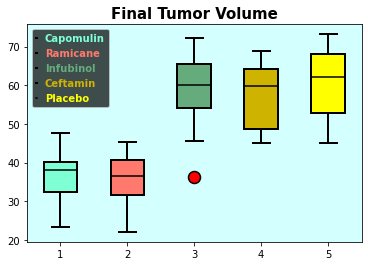

In [19]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#generate a box_plot parsable formatting of the four test cases
data = [final_tumor_points.loc[treatment]['final tumor'] for treatment in treatments]
#initialize a counter for synchronizeing color
icounter=0
#colors to set across the different groups
colors = ['aquamarine', 'xkcd:salmon', 'xkcd:tea', 'xkcd:mustard', 'yellow']
#general outline param to pass to different figure elements
outline= {'linewidth':2}
#custom dict to define how the outlier should look
flierprops=dict(marker='o', markerfacecolor='red', markersize=12, markeredgewidth=1.5)
#generate new subplot
tv_fig, tv_ax = plt.subplots()
tv_ax.set_title('Final Tumor Volume', fontweight='bold', fontsize='15')
#change the color of the background of the plot.
tv_ax.set_facecolor('xkcd:really light blue')
boxes = tv_ax.boxplot(data, 
                      #patch artist allows me to manually control the facecolor of the boxes, assigning them the colors in my earlier array)
                      patch_artist = True, 
                      medianprops={'color':'black', 'linewidth':1.5}, flierprops=flierprops, boxprops=outline, whiskerprops=outline, capprops=outline)
#change colors of the boxes
for box in boxes['boxes']:
    box.set(facecolor = colors[icounter], linewidth=2)
    icounter +=1
#Set a custom legend with text color used to match with blocks
tv_ax.legend(loc='best', labels=treatments, labelcolor= colors, facecolor='black', framealpha=0.7, handlelength = .1, fontsize=10, prop={'weight':'semibold'})
plt.show()

### Generate a plot with boxes from every group for reference.

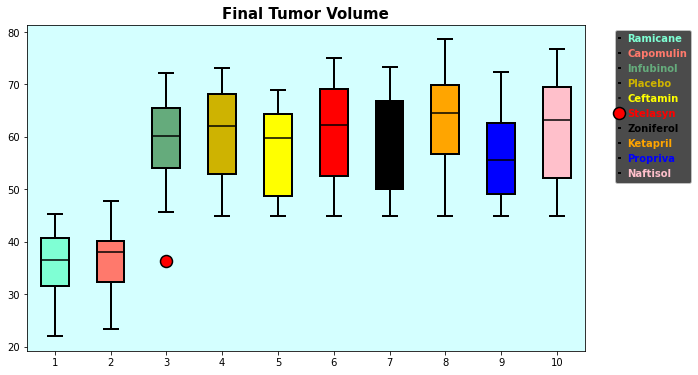

In [42]:
#Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#generate a box_plot parsable formatting of the four test cases
all_treatments=combine['Drug Regimen'].unique()
data = [final_tumor_points.loc[treatment]['final tumor'] for treatment in all_treatments]
#initialize a counter for synchronizeing color
icounter=0
#colors to set across the different groups
colors = ['aquamarine', 'xkcd:salmon', 'xkcd:tea', 'xkcd:mustard', 'yellow', 'red', 'black', 'orange', 'blue', 'pink']
#general outline param to pass to different figure elements
outline= {'linewidth':2}
#custom dict to define how the outlier should look
flierprops=dict(marker='o', markerfacecolor='red', markersize=12, markeredgewidth=1.5)
#generate new subplot
tv_fig, tv_ax = plt.subplots(figsize=(10,6))
tv_ax.set_title('Final Tumor Volume', fontweight='bold', fontsize='15')
#change the color of the background of the plot.
tv_ax.set_facecolor('xkcd:really light blue')
boxes = tv_ax.boxplot(data, 
                      #patch artist allows me to manually control the facecolor of the boxes, assigning them the colors in my earlier array)
                      patch_artist = True, 
                      medianprops={'color':'black', 'linewidth':1.5}, flierprops=flierprops, boxprops=outline, whiskerprops=outline, capprops=outline)
#change colors of the boxes
for box in boxes['boxes']:
    box.set(facecolor = colors[icounter], linewidth=2)
    icounter +=1
#Set a custom legend with text color used to match with blocks
tv_ax.legend(loc='best', labels=treatments, labelcolor= colors, facecolor='black', framealpha=0.7, handlelength = .1, fontsize=10, prop={'weight':'semibold'}, bbox_to_anchor=(1.2, 1))
plt.show()

## Line and Scatter Plots

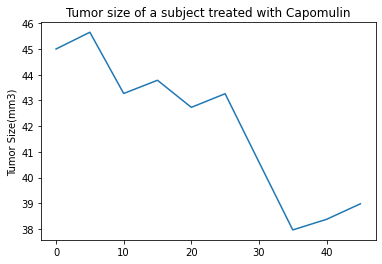

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
fig, ax = plt.subplots()
ax.plot(tumor_time_points.loc['Capomulin'].iloc[0])
ax.set_title('Tumor size of a subject treated with Capomulin')
ax.set_ylabel('Tumor Size(mm3)')
plt.show()

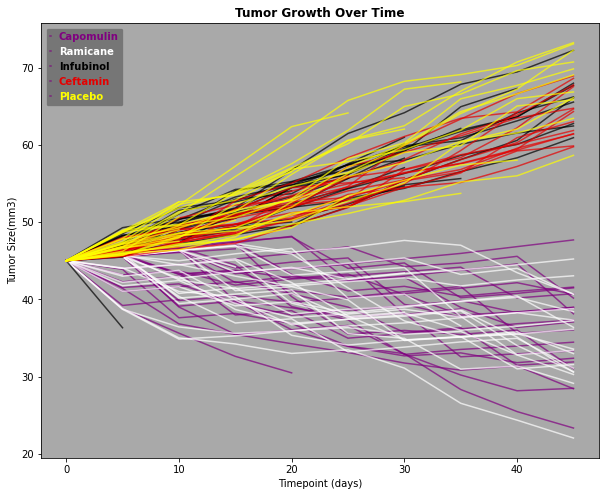

In [33]:
#As a bonus, I create a lineplot for all subjects in my groups of interest
m_fig, m_ax = plt.subplots(figsize=(10,8))
colit = 0
colors = ['purple', 'xkcd:white', 'xkcd:black', 'xkcd:red', 'yellow']
m_ax.set_facecolor('darkgrey')
m_ax.set_title('Tumor Growth Over Time', fontweight='bold')
m_ax.set_ylabel('Tumor Size(mm3)')
m_ax.set_xlabel('Timepoint (days)')
#Make a line plot for each mouse in treatment groups. As I iterate across my groups of interest, I change the colors using colit.
for treatment in treatments:
    for timepoints, mouse in tumor_time_points.loc[treatment].iterrows():
        m_ax.plot(mouse, colors[colit], alpha = 0.7)
    colit += 1
m_ax.legend(loc='best', labels=treatments, labelcolor= colors, facecolor='black', framealpha=0.3, handlelength = .1, fontsize=10, prop={'weight':'semibold'})

plt.show()

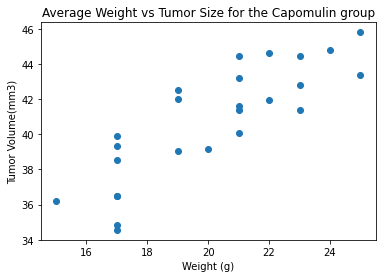

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
cap_av_weight_tumor = combine.set_index('Drug Regimen').loc['Capomulin'].groupby('Mouse ID').mean()[['Weight (g)', 'Tumor Volume (mm3)']]
#Could also subset like this, but I prefer set index for legibility and iterability. 
#capomulin = combine.loc[combine['Drug Regimen']== 'Capomulin']
sfig, sax = plt.subplots()
sax.scatter(cap_av_weight_tumor['Weight (g)'], cap_av_weight_tumor['Tumor Volume (mm3)'])
sax.set_title("Average Weight vs Tumor Size for the Capomulin group")
sax.set_ylabel('Tumor Volume(mm3)')
sax.set_xlabel('Weight (g)')
plt.show()

## Correlation and Regression

In [23]:
#Calculate the correlation coefficient
correlation = st.pearsonr(cap_av_weight_tumor['Weight (g)'], cap_av_weight_tumor['Tumor Volume (mm3)'])
print(f'The correlation between Weight and Tumor Volume is {round(correlation[0], 2)} with a p value of {round(correlation[1], 8)}')

The correlation between Weight and Tumor Volume is 0.84 with a p value of 1.3e-07


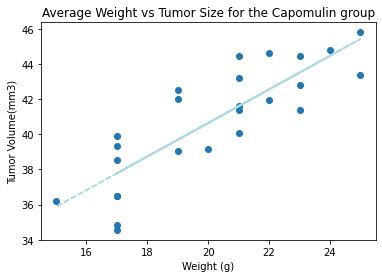

In [24]:
#  linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
s_slope, s_int, s_r, s_p, s_std_err = st.linregress(cap_av_weight_tumor['Weight (g)'], cap_av_weight_tumor['Tumor Volume (mm3)'])
s_fit = s_slope * cap_av_weight_tumor['Weight (g)'] + s_int

sfig, sax = plt.subplots()
sax.scatter(cap_av_weight_tumor['Weight (g)'], cap_av_weight_tumor['Tumor Volume (mm3)'])
sax.plot(cap_av_weight_tumor['Weight (g)'], s_fit, '--', color = 'lightblue')
sax.set_title("Average Weight vs Tumor Size for the Capomulin group")
sax.set_ylabel('Tumor Volume(mm3)')
sax.set_xlabel('Weight (g)')
plt.show()

### Male vs Female

In [50]:
combine.groupby('Sex').mean()[['Weight (g)','Tumor Volume (mm3)']]

,Weight (g),Tumor Volume (mm3)
Sex,,
Female,25.909978,51.083168
Male,25.419624,49.811764
